# Insights into Forest Fires

## Loading libraries

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut

import warnings

# Supressing the warning on the usage of Linear Regression model
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## Working with the dataset

### Loading the dataset

In [22]:
forest_fires = pd.read_csv('forest_fires.csv')
forest_fires

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


### Converting the labels under month and day to integers

In [26]:
forest_fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)

forest_fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

### Statistical analysis of dataset

In [27]:
forest_fires.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Extracting features from the dataset

In [140]:
x_values = list(forest_fires['X'])
y_values = list(forest_fires['Y'])

loc_values = []

for index in range(0, len(x_values)):
    temp_value = []

    temp_value.append(x_values[index])
    temp_value.append(y_values[index])
    loc_values.append(temp_value)

In [96]:
month_values = list(forest_fires['month'])
day_values = list(forest_fires['day'])

ffmc_values = list(forest_fires['FFMC'])
dmc_values = list(forest_fires['DMC'])
dc_values = list(forest_fires['DC'])
isi_values = list(forest_fires['ISI'])

temp_values = list(forest_fires['temp'])
rh_values = list(forest_fires['RH'])
wind_values = list(forest_fires['wind'])
rain_values = list(forest_fires['rain'])

area_values = list(forest_fires['area'])

In [148]:
attribute_list = []

for index in range(0, len(x_values)):
    temp_list = []
    
    temp_list.append(x_values[index])
    temp_list.append(y_values[index])
    
    temp_list.append(month_values[index])
    temp_list.append(day_values[index])

    temp_list.append(ffmc_values[index])
    temp_list.append(dmc_values[index])
    temp_list.append(dc_values[index])
    temp_list.append(isi_values[index])

    temp_list.append(temp_values[index])
    temp_list.append(rh_values[index])
    temp_list.append(wind_values[index])
    temp_list.append(rain_values[index])
    
    attribute_list.append(temp_list)

### Counting the instances of location points in dataset

In [130]:
def count_points(x_points, y_points, scaling_factor):
    count_array = []
    
    for index in range(0, len(x_points)):
        temp_value = [x_points[index], y_points[index]]
        count = 0
        
        for value in loc_values:
            if(temp_value == value):
                count = count + 1
        count_array.append(count * scaling_factor )

    return count_array

### Histogram plotting function for dataset

In [131]:
def histogram_plot(dataset, title):
    plt.figure(figsize=(10, 7.5))    
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.title(title, fontsize = 22)
    plt.hist(dataset, edgecolor='black', linewidth=1.2)

### Scatter plot for the locations

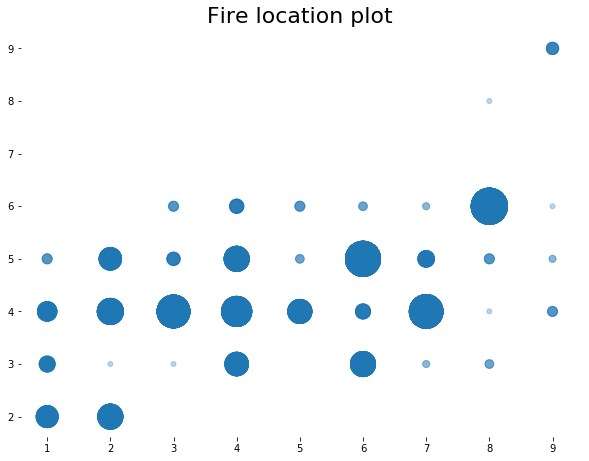

In [139]:
plt.figure(figsize=(10, 7.5))    
    
ax = plt.subplot()    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
    
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left() 
    
plt.title("Fire location plot", fontsize = 22)
plt.scatter(x_values, y_values, s = count_points(x_values, y_values, 25), alpha = 0.3)

### Plotting the distribution of values for the dataset

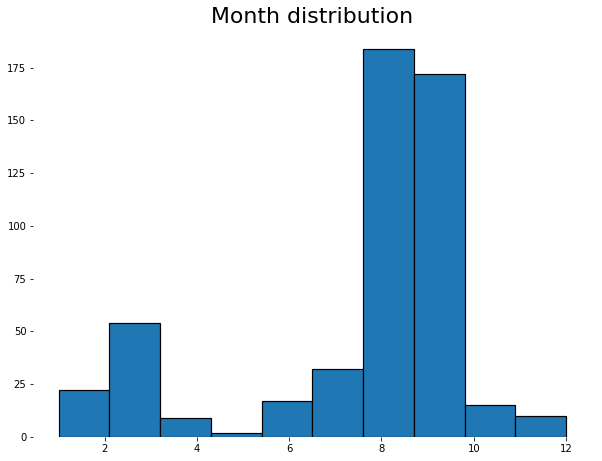

In [76]:
histogram_plot(month_values, title = "Month distribution")

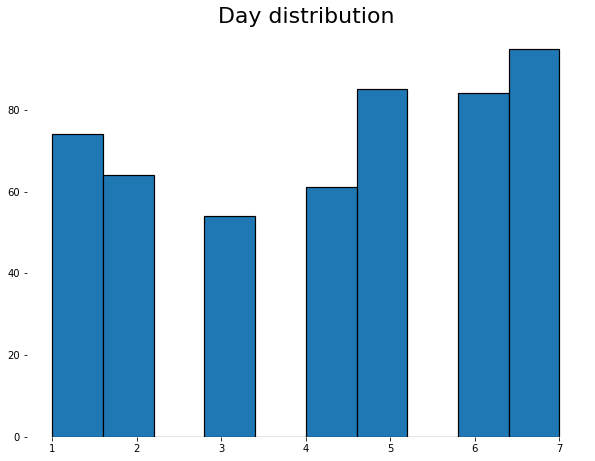

In [77]:
histogram_plot(day_values, title = "Day distribution")

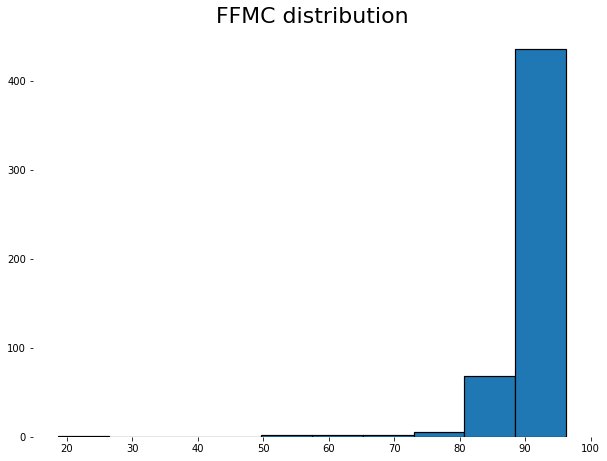

In [80]:
histogram_plot(ffmc_values, title = "FFMC distribution")

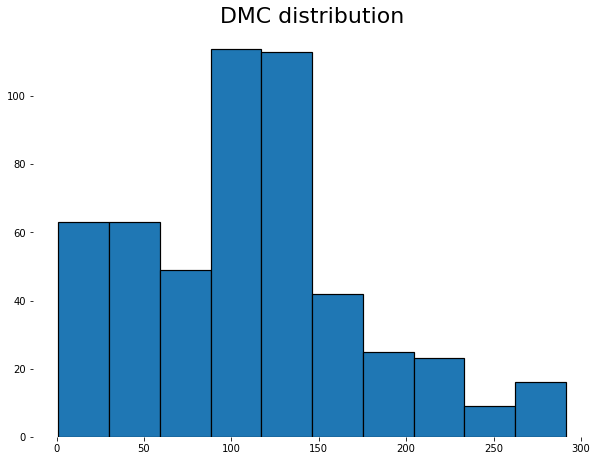

In [81]:
histogram_plot(dmc_values, title = "DMC distribution")

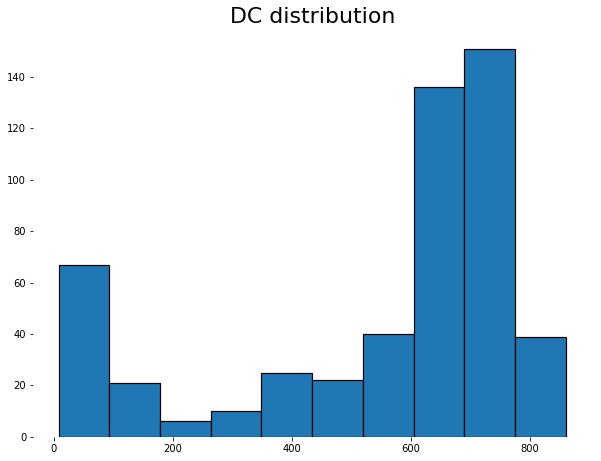

In [82]:
histogram_plot(dc_values, title = "DC distribution")

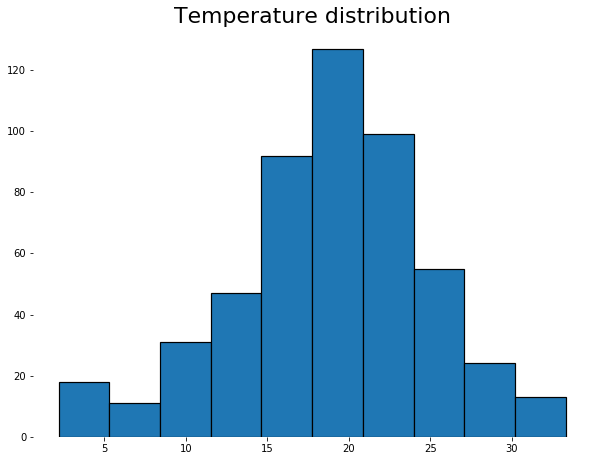

In [84]:
histogram_plot(isi_values, title = "ISI distribution")

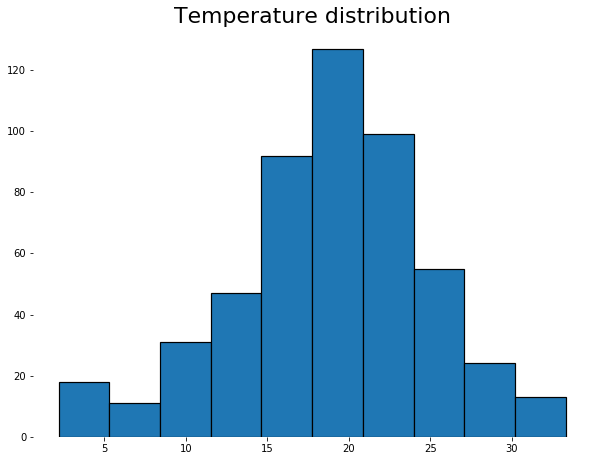

In [85]:
histogram_plot(temp_values, title = "Temperature distribution")

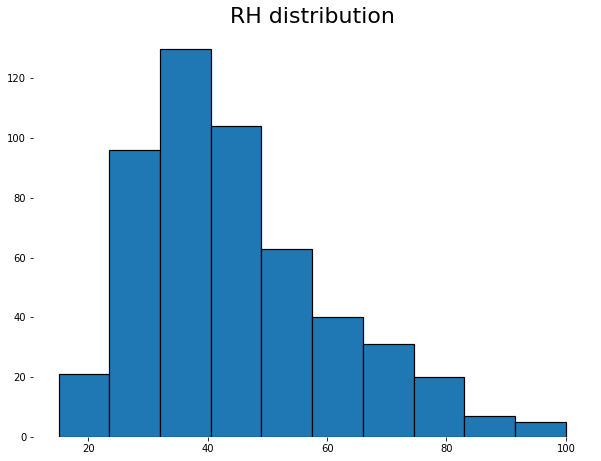

In [86]:
histogram_plot(rh_values, title = "RH distribution")

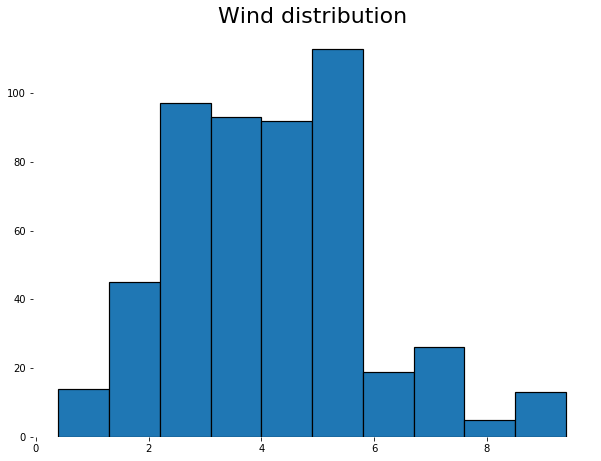

In [87]:
histogram_plot(wind_values, title = "Wind distribution")

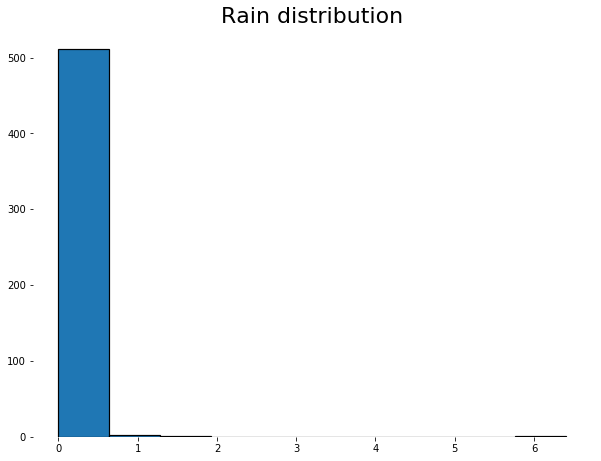

In [88]:
histogram_plot(rain_values, title = "Rain distribution")

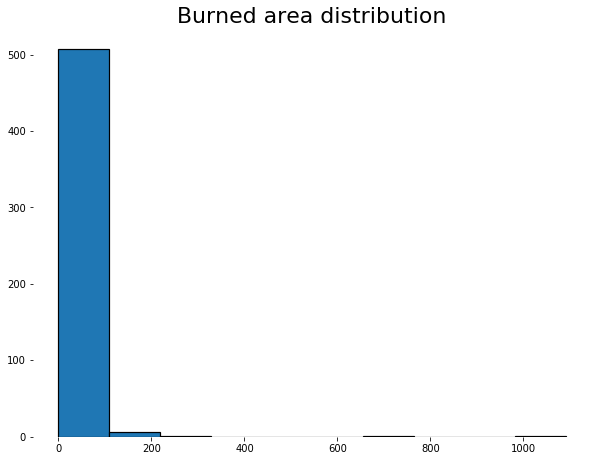

In [90]:
histogram_plot(area_values, title = "Burned area distribution")

## Gaining insights with learning models

### Linear regression model

In [164]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(attribute_list, area_values)

test_attributes = attribute_list[0:50]
actual_output = area_values[0:50]

predicted_output = linear_regression.predict(test_attributes)

print('Coefficients: \n', linear_regression.coef_)

print("Mean squared error: ", mean_squared_error(actual_output, predicted_output))
print('Variance score: %.2f' % r2_score(actual_output, predicted_output))

Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  236.78312335894645
Variance score: 0.00


### Leave-One-Out validation

In [177]:
leave_one_out = LeaveOneOut()
total_squared_error = 0
total_r2_score = 0
total_loops = 0

for train_index, test_index in leave_one_out.split(attribute_list):
    
    train_attributes = []
    train_outputs = []
    test_attributes = []
    actual_outputs = []
    
    for value in train_index:
        train_attributes.append(attribute_list[value])
        train_outputs.append(area_values[value])
    
    for value in test_index:
        test_attributes.append(attribute_list[value])
        actual_outputs.append(area_values[value])
    
    predicted_output = linear_regression.predict(test_attributes)
    
    total_squared_error = total_squared_error + mean_squared_error(actual_outputs, predicted_output)
    total_r2_errors = total_r2_errors + r2_score(actual_outputs, predicted_output)
    total_loops = total_loops + 1
    
print("The sqaured errors ")

Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  48.13220353552401
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  128.02703061864557
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  148.30492371131695
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  41.18690023497033
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.7

Mean squared error:  257.90123111503664
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  2.2714588580461132
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  285.3824010902537
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  285.3824010902537
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  16.98770305286094
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.73

 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  5.275315291110912
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  14.62294958208352
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  38.27508254248465
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  50.47317332736516
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  24.8175182407

Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  574.3820327889218
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  21.91280032540745
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  315.19654015443155
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  165.09620315740943
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.7

Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  101.98767731856786
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  52.41522447960433
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  21.284688251173677
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  49.2994232914704
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.097586

Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  169.76941356279784
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  905.7907176352047
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  320.4915591057903
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758667
 -0.02970081 -0.72959547  0.85659867 -0.21478604  1.18506895 -2.93577716]
Mean squared error:  178.00827140953595
Variance score: 0.00
Coefficients: 
 [ 1.96527223  0.27823493  2.7379971   0.75506519 -0.06618619  0.09758